In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Simple Recommender System Tutorial #1 : 2nd Class Recommendation
In this first example, we are going to build a very simple recommender system for a student who already enroll a class before, and we are going to recommend them a 2nd class based on the similarity of what they learn

### Step #01 : create the data/documents for the basis of recommendation

In [2]:
# 3 document
doc_WM = 'Today, we learn how to build dynamic website and mobile apps'
doc_DM = 'Today, we learn how to promote product to segmented market'
doc_DS = 'Today, we learn how to build recommender system'

documents = [doc_WM, doc_DM, doc_DS]

### Step #02 : Fit the model to learn from the documents and create a document-term matrix as an output

In [3]:
#Saving CountVectorizer in a variable to ease the fitting process and using it to learn from the documents
count_vectorizer = CountVectorizer(stop_words='english')

#fit the model (learn from documents) and also return a document-term matrix at the same time
sparse_matrix = count_vectorizer.fit_transform(documents)

### Step #03 : Create a DataFrame from the matrix to prepare for cosine similarity

This step is actually unnecessary, you can directly go to step 4 and calculate the cosine similarity from the sparse matrix, this step is shown in this tutorial so that you could understand better of what is actually happens and why we need CountVectorizer

In [4]:
#turn the document-term matrix into a dense matrix
doc_matrix = sparse_matrix.todense()

#create a dataframe from that dense matrix to see how the matrix actually looks like
# and understand the role of countvectorizer
df_coba = pd.DataFrame(doc_matrix, 
                       columns=count_vectorizer.get_feature_names(),
                       index = ['doc_WM', 'doc_DM', 'doc_DS'])
df_coba

,apps,build,dinamic,learn,market,mobile,product,promote,recommender,segmented,today,website
doc_WM,1,1,1,1,0,1,0,0,0,0,1,1
doc_DM,0,0,0,1,1,0,1,1,0,1,1,0
doc_DS,0,1,0,1,0,0,0,0,1,0,1,0


### Step #04 : Calculate the Cosine Similarity Score and visualize it (optional)

In [5]:
cosine_similarity(sparse_matrix)

array([[1.        , 0.3086067 , 0.56694671],
       [0.3086067 , 1.        , 0.40824829],
       [0.56694671, 0.40824829, 1.        ]])

In [6]:
cosine_similarity(df_coba)

array([[1.        , 0.3086067 , 0.56694671],
       [0.3086067 , 1.        , 0.40824829],
       [0.56694671, 0.40824829, 1.        ]])

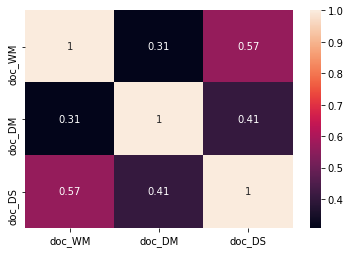

In [43]:
import seaborn as sns

# calculate the cosine similarity score to know the similar class for the basis of recommendation
cscore = cosine_similarity(df_coba)

# Visualize the similarity Score
sns.heatmap(cosine_similarity(df_coba), 
            annot=True, xticklabels=df_coba.index, 
            yticklabels=df_coba.index);

### Step #05 : Try the Recommendation System

In [49]:
#Get the input data (what class that he/she has taken before)
class_taken = int(input('What Class Have you taken? (0:WM / 1:DM / 2:DS): '))

#Create a list of tuple consisting the class number and its cscore
class_recom = list(enumerate(cscore[class_taken]))
the_recom = sorted(class_recom, key=lambda x:x[1], reverse=True) #sort the highest cscore to recommend

# create a looping to show the recommendation
next_class =[]
for i in the_recom[1:]:
    next_class.append(i[0])

classes = ['Web and Mobile', 'Digital Marketing', 'Data Science']
n=1

print('Class Special For You!')    
for i in next_class:
    print('{}. {}'.format(n, classes[i]))
    n+=1

What Class Have you taken? (0:WM / 1:DM / 2:DS): 1
Class Special For You!
1. Data Science
2. Web and Mobile


## Simple Recommender System Tutorial #2 : Music Recommendation
In this second example, we are going to build a very simple music recommender system based on the previous music genre that a particular customer pick

### Step #01 : create the data

In [9]:
df = pd.DataFrame({'title'   :[('Song_'+ str(i)) for i in range(1,11)],
              'genre'   :['pop', 'jazz', 'dangdut', 'pop', 'jazz', 'dangdut', 
                          'pop', 'jazz', 'dangdut', 'pop'],
              'penyanyi':['Andi', 'Andi', 'Andi','Budi', 'Budi', 'Budi', 
                          'Caca', 'Caca', 'Caca', 'Caca']})
df

,title,genre,penyanyi
0,Song_1,pop,Andi
1,Song_2,jazz,Andi
2,Song_3,dangdut,Andi
3,Song_4,pop,Budi
4,Song_5,jazz,Budi
5,Song_6,dangdut,Budi
6,Song_7,pop,Caca
7,Song_8,jazz,Caca
8,Song_9,dangdut,Caca
9,Song_10,pop,Caca


In [10]:
cv = CountVectorizer()
genre = cv.fit_transform(df['genre'])
cv.get_feature_names()

['dangdut', 'jazz', 'pop']

In [11]:
genre.toarray()

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [12]:
genre_matrix = genre.toarray()
df_matrix = pd.DataFrame(genre_matrix, columns=cv.get_feature_names())
df_matrix

,dangdut,jazz,pop
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,0,1


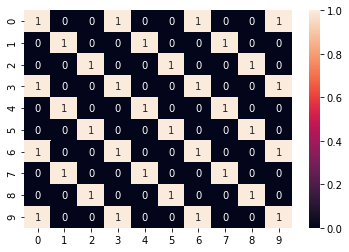

In [13]:
cosScore = cosine_similarity(df_matrix)
sns.heatmap(cosScore, annot=True)

In [51]:
last_played = int(input('terakhir didengar? ')) #index

music_recom = list(enumerate(cosScore[last_played]))

your_recom = sorted(music_recom, key = lambda x: x[1], reverse=True)
your_recom[:5]

# Showing 5 recommended music based on the input music
recom = []
for i in your_recom[:5]:
    recom.append(df.iloc[i[0]][0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}'.format(1+i, recom[i]))

terakhir didengar? 9
Special Pick For You!
1. Song_1
2. Song_4
3. Song_7
4. Song_10
5. Song_2


In [17]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [19]:
anime = anime.iloc[:, :4]
anime.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [20]:
anime.isna().sum()

anime_id     0
name         0
genre       62
type        25
dtype: int64

In [24]:
anime.dropna(inplace= True)

In [25]:
anime_notnull = anime.dropna()
anime_notnull

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [26]:
cv = CountVectorizer(tokenizer=lambda x:x.split(', '))
by_genre = cv.fit_transform(anime_notnull['genre'])

In [27]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

43
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri']


In [28]:
by_genre.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
coScore_anime = cosine_similarity(by_genre)

In [52]:
new_anime = anime_notnull.reset_index()
new_anime.head()

,index,anime_id,name,genre,type
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [53]:
anime_liked = input('Apa anime yang anda sukai? ')

index_suka = new_anime[new_anime['name']==anime_liked].index
index_suka[0]

anime_recom = list(enumerate(coScore_anime[index_suka[0]]))

your_recom = sorted(anime_recom, key = lambda x: x[1], reverse=True)

# Showing 5 recommended anime based on the input anime
recom = []
for i in your_recom[9:19]:
    recom.append(new_anime.iloc[i[0]][0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}, (Genre : {})'.format(1+i, new_anime.iloc[recom[i], 2],new_anime.iloc[recom[i], 3] ))

Apa anime yang anda sukai? Windaria
Special Pick For You!
1. Aquarion Evol, (Genre : Action, Comedy, Drama, Fantasy, Mecha, Romance, Sci-Fi)
2. Grandeek, (Genre : Adventure, Fantasy, Magic)
3. Shakugan no Shana III (Final), (Genre : Action, Drama, Fantasy, Romance, Supernatural)
4. Final Fantasy VII: Last Order, (Genre : Action, Adventure, Drama, Fantasy, Sci-Fi)
5. Giniro no Kami no Agito, (Genre : Adventure, Drama, Fantasy, Romance, Sci-Fi)
6. Gambo, (Genre : Demons, Historical)
7. Fushigiboshi no☆Futagohime Gyu! Recap, (Genre : Comedy, Magic, Shoujo)
8. Chiisana Kyojin Microman, (Genre : Action, Adventure, Comedy, Kids, Mecha, Sci-Fi, Shounen, Super Power)
9. Barbapapa Sekai wo Mawaru, (Genre : Adventure, Comedy)
10. Wakusei Robo Danguard Ace tai Konchuu Robot Gundan, (Genre : Mecha, Sci-Fi)


In [34]:
by_type = cv.fit_transform(anime_notnull['type'])
coScore_anime_2 = cosine_similarity(by_type)

In [35]:
anime_liked = input('Apa anime yang anda sukai? ')

index_suka = new_anime[new_anime['name']==anime_liked].index
index_suka[0]

anime_recom = list(enumerate(coScore_anime_2[index_suka[0]]))

your_recom = sorted(anime_recom, key = lambda x: x[1], reverse=True)

# Showing 5 recommended music based on the input music
recom = []
for i in your_recom[9:19]:
    recom.append(new_anime.iloc[i[0]][0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}, (Type : {})'.format(1+i, new_anime.iloc[recom[i], 2],new_anime.iloc[recom[i], 4] ))

Apa anime yang anda sukai? Kimi no Na wa.
Special Pick For You!
1. Kizumonogatari II: Nekketsu-hen, (Type : Movie)
2. Kara no Kyoukai 5: Mujun Rasen, (Type : Movie)
3. Tengen Toppa Gurren Lagann Movie: Lagann-hen, (Type : Movie)
4. Steins;Gate Movie: Fuka Ryouiki no Déjà vu, (Type : Movie)
5. Hotarubi no Mori e, (Type : Movie)
6. Gintama: Yorinuki Gintama-san on Theater 2D, (Type : Movie)
7. Gintama Movie: Shinyaku Benizakura-hen, (Type : Movie)
8. Bakemono no Ko, (Type : Movie)
9. Hotaru no Haka, (Type : Movie)
10. Kara no Kyoukai 7: Satsujin Kousatsu (Kou), (Type : Movie)


In [36]:
new_anime['genre_type'] = new_anime['genre'] +str(', ') + new_anime['type']

In [37]:
new_anime

,index,anime_id,name,genre,type,genre_type
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,"Drama, Romance, School, Supernatural, Movie"
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Action, Comedy, Historical, Parody, Samurai, S..."
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,"Sci-Fi, Thriller, TV"
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...,...,...,...,...
12205,12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,"Hentai, OVA"
12206,12290,5543,Under World,Hentai,OVA,"Hentai, OVA"
12207,12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,"Hentai, OVA"
12208,12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,"Hentai, OVA"


In [38]:
by_type_genre = cv.fit_transform(new_anime['genre_type'])

In [39]:
coScore_anime_3 = cosine_similarity(by_type_genre)

In [40]:
print(cv.get_feature_names())

['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'movie', 'music', 'mystery', 'ona', 'ova', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'special', 'sports', 'super power', 'supernatural', 'thriller', 'tv', 'vampire', 'yaoi', 'yuri']


In [41]:
anime_liked = input('Apa anime yang anda sukai? ')

index_suka = new_anime[new_anime['name']==anime_liked].index
index_suka[0]

anime_recom = list(enumerate(coScore_anime_3[index_suka[0]]))

your_recom = sorted(anime_recom, key = lambda x: x[1], reverse=True)

# Showing 5 recommended music based on the input music
recom = []
for i in your_recom[:20]:
    recom.append(new_anime.iloc[i[0]][0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}, (Genre : {}, Type: {})'.format(1+i, new_anime.iloc[recom[i], 2],new_anime.iloc[recom[i], 3],
                                               new_anime.iloc[recom[i], 4]))

Apa anime yang anda sukai? Kimi no Na wa.
Special Pick For You!
1. Kimi no Na wa., (Genre : Drama, Romance, School, Supernatural, Type: Movie)
2. Aura: Maryuuin Kouga Saigo no Tatakai, (Genre : Comedy, Drama, Romance, School, Supernatural, Type: Movie)
3. Kokoro ga Sakebitagatterunda., (Genre : Drama, Romance, School, Type: Movie)
4. Harmonie, (Genre : Drama, School, Supernatural, Type: Movie)
5. Air Movie, (Genre : Drama, Romance, Supernatural, Type: Movie)
6. Hotarubi no Mori e, (Genre : Drama, Romance, Shoujo, Supernatural, Type: Movie)
7. &quot;Bungaku Shoujo&quot; Movie, (Genre : Drama, Mystery, Romance, School, Type: Movie)
8. Clannad Movie, (Genre : Drama, Fantasy, Romance, School, Type: Movie)
9. Tetsuwan Atom: Atom Tanjou no Himitsu, (Genre : Drama, Mecha, Sci-Fi, Type: Movie)
10. Amanatsu, (Genre : Sci-Fi, Type: Movie)
11. Diabolik Lovers More,Blood, (Genre : Harem, School, Shoujo, Vampire, Type: TV)
12. Joshikousei no Koshitsuki, (Genre : Hentai, Type: OVA)
13. Momo e no Teg

In [42]:
anime_liked = input('Apa anime yang anda sukai? ')

index_suka = new_anime[new_anime['name']==anime_liked].index
index_suka[0]

anime_recom = list(enumerate(coScore_anime_3[index_suka[0]]))

your_recom = sorted(anime_recom, key = lambda x: x[1], reverse=True)

# Showing 5 recommended music based on the input music
recom = []
for i in your_recom[:20]:
    recom.append(new_anime.iloc[i[0]][0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}, (Genre : {}, Type: {})'.format(1+i, new_anime.iloc[recom[i], 2],new_anime.iloc[recom[i], 3],
                                               new_anime.iloc[recom[i], 4]))

Apa anime yang anda sukai? Kimi no Na wa.
Special Pick For You!
1. Kimi no Na wa., (Genre : Drama, Romance, School, Supernatural, Type: Movie)
2. Aura: Maryuuin Kouga Saigo no Tatakai, (Genre : Comedy, Drama, Romance, School, Supernatural, Type: Movie)
3. Kokoro ga Sakebitagatterunda., (Genre : Drama, Romance, School, Type: Movie)
4. Harmonie, (Genre : Drama, School, Supernatural, Type: Movie)
5. Air Movie, (Genre : Drama, Romance, Supernatural, Type: Movie)
6. Hotarubi no Mori e, (Genre : Drama, Romance, Shoujo, Supernatural, Type: Movie)
7. &quot;Bungaku Shoujo&quot; Movie, (Genre : Drama, Mystery, Romance, School, Type: Movie)
8. Clannad Movie, (Genre : Drama, Fantasy, Romance, School, Type: Movie)
9. Tetsuwan Atom: Atom Tanjou no Himitsu, (Genre : Drama, Mecha, Sci-Fi, Type: Movie)
10. Amanatsu, (Genre : Sci-Fi, Type: Movie)
11. Diabolik Lovers More,Blood, (Genre : Harem, School, Shoujo, Vampire, Type: TV)
12. Joshikousei no Koshitsuki, (Genre : Hentai, Type: OVA)
13. Momo e no Teg

In [63]:
new_anime[(new_anime['type'] == 'OVA') & (new_anime['genre'] == 'Hentai')]

,index,anime_id,name,genre,type
11032,11114,11879,Oni Chichi: Re-born,Hentai,OVA
11033,11115,29575,Mankitsu Happening,Hentai,OVA
11034,11116,15843,Koiito Kinenbi The Animation,Hentai,OVA
11035,11117,21097,Oni Chichi: Rebuild,Hentai,OVA
11037,11119,10779,Eroge! H mo Game mo Kaihatsu Zanmai,Hentai,OVA
...,...,...,...,...,...
12204,12288,5541,The Satisfaction,Hentai,OVA
12205,12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12206,12290,5543,Under World,Hentai,OVA
12207,12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
